In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, geom_text, theme_bw, geom_segment, arrow

In [3]:
# Read the CSV file into a DataFrame
WineData = pd.read_csv("wine.csv")

# Display structure of the DataFrame
print(WineData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WineClass            178 non-null    object 
 1   Alcohol              178 non-null    float64
 2   MalicAcid            178 non-null    float64
 3   Ash                  178 non-null    float64
 4   AlkalinityAsh        178 non-null    float64
 5   Mg                   178 non-null    int64  
 6   Phenols              178 non-null    float64
 7   Flavanoids           178 non-null    float64
 8   NonFlavanoidPhenols  178 non-null    float64
 9   Proanthocyanins      178 non-null    float64
 10  Color                178 non-null    float64
 11  Hue                  178 non-null    float64
 12  ODRatio              178 non-null    float64
 13  Proline              178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB
None


In [4]:
WineData.head()

WineClass  Alcohol  MalicAcid   Ash  AlkalinityAsh   Mg  Phenols  \
0    barolo    14.23       1.71  2.43           15.6  127     2.80   
1    barolo    13.20       1.78  2.14           11.2  100     2.65   
2    barolo    13.16       2.36  2.67           18.6  101     2.80   
3    barolo    14.37       1.95  2.50           16.8  113     3.85   
4    barolo    13.24       2.59  2.87           21.0  118     2.80   

   Flavanoids  NonFlavanoidPhenols  Proanthocyanins  Color   Hue  ODRatio  \
0        3.06                 0.28             2.29   5.64  1.04     3.92   
1        2.76                 0.26             1.28   4.38  1.05     3.40   
2        3.24                 0.30             2.81   5.68  1.03     3.17   
3        3.49                 0.24             2.18   7.80  0.86     3.45   
4        2.69                 0.39             1.82   4.32  1.04     2.93   

   Proline  
0     1065  
1     1050  
2     1185  
3     1480  
4      735

In [5]:
# Extract predictors (remove the class variable from the first column)
wine_predictors = WineData.iloc[:, 1:]

# Scale the predictors
scaled_predictors = StandardScaler().fit_transform(wine_predictors)

# Display scaled predictors
print(scaled_predictors)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [6]:
# Calculate covariance matrix
c = np.cov(scaled_predictors, rowvar=False)

# Display covariance matrix
print(c)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(c)

# Display eigenvalues and eigenvectors
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

In [7]:
# Perform PCA
pca = PCA()
pca_out = pca.fit_transform(scaled_predictors)

# Display results of PCA
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))
print("Principal Components:")
print(pca.components_)

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Cumulative Explained Variance Ratio: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]
Principal Components:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777

In [8]:
# Display summary statistics of PCA
print(pd.DataFrame(pca_out, columns=[f"PC{i+1}" for i in range(pca_out.shape[1])]).describe())

                PC1           PC2           PC3           PC4           PC5  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -1.596725e-16  6.985673e-17 -3.991813e-17  3.991813e-17  9.979533e-18   
std    2.175417e+00  1.584639e+00  1.205920e+00  9.613355e-01  9.263092e-01   
min   -4.280639e+00 -3.871784e+00 -4.585064e+00 -2.890120e+00 -2.023127e+00   
25%   -2.172762e+00 -1.398300e+00 -8.311875e-01 -6.860538e-01 -5.734337e-01   
50%    6.051146e-02  2.620302e-01 -1.416121e-01 -2.579312e-02 -2.658996e-01   
75%    2.001293e+00  1.233675e+00  7.600610e-01  5.871144e-01  3.550493e-01   
max    4.312784e+00  3.515090e+00  5.345388e+00  3.790335e+00  4.186657e+00   

                PC6           PC7         PC8           PC9          PC10  \
count  1.780000e+02  1.780000e+02  178.000000  1.780000e+02  1.780000e+02   
mean   3.991813e-17  4.054185e-17    0.000000  2.494883e-17 -2.245395e-17   
std    8.032946e-01  7.444068e-01    0.592002  5.389917e-

In [9]:
# Create a DataFrame for summary statistics
summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance Explained': pca.explained_variance_ratio_,
    'Cumulative Proportion of Variance Explained': np.cumsum(pca.explained_variance_ratio_)
}, index=[f"PC{i+1}" for i in range(pca_out.shape[1])])

# Set display options to show all columns in a single row
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Display summary statistics
print(summary_df)

      Standard Deviation  Proportion of Variance Explained  Cumulative Proportion of Variance Explained
PC1             2.175417                          0.361988                                     0.361988
PC2             1.584639                          0.192075                                     0.554063
PC3             1.205920                          0.111236                                     0.665300
PC4             0.961335                          0.070690                                     0.735990
PC5             0.926309                          0.065633                                     0.801623
PC6             0.803295                          0.049358                                     0.850981
PC7             0.744407                          0.042387                                     0.893368
PC8             0.592002                          0.026807                                     0.920175
PC9             0.538992                          0.022222      

In [10]:
# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')

# Display loadings
print("Loadings:")
print(pd.DataFrame(pca.components_, columns=wine_predictors.columns))

Loadings:
     Alcohol  MalicAcid       Ash  AlkalinityAsh        Mg   Phenols  \
0   0.144329  -0.245188 -0.002051      -0.239320  0.141992  0.394661   
1   0.483652   0.224931  0.316069      -0.010591  0.299634  0.065040   
2  -0.207383   0.089013  0.626224       0.612080  0.130757  0.146179   
3  -0.017856   0.536890 -0.214176       0.060859 -0.351797  0.198068   
4  -0.265664   0.035214 -0.143025       0.066103  0.727049 -0.149318   
5   0.213539   0.536814  0.154475      -0.100825  0.038144 -0.084122   
6  -0.056396   0.420524 -0.149171      -0.286969  0.322883 -0.027925   
7   0.396139   0.065827 -0.170260       0.427970 -0.156361 -0.405934   
8  -0.508619   0.075283  0.307694      -0.200449 -0.271403 -0.286035   
9   0.211605  -0.309080 -0.027125       0.052799  0.067870 -0.320131   
10 -0.225917   0.076486 -0.498691       0.479314  0.071289  0.304341   
11 -0.266286   0.121696 -0.049622      -0.055743  0.062220 -0.303882   
12  0.014970   0.025964 -0.141218       0.091683  0.05

In [11]:
# Create a DataFrame for loadings
loadings_df = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(pca_out.shape[1])], index=wine_predictors.columns)

# Display loadings
print(loadings_df)

                          PC1       PC2       PC3       PC4       PC5  \
Alcohol              0.144329  0.483652 -0.207383 -0.017856 -0.265664   
MalicAcid           -0.245188  0.224931  0.089013  0.536890  0.035214   
Ash                 -0.002051  0.316069  0.626224 -0.214176 -0.143025   
AlkalinityAsh       -0.239320 -0.010591  0.612080  0.060859  0.066103   
Mg                   0.141992  0.299634  0.130757 -0.351797  0.727049   
Phenols              0.394661  0.065040  0.146179  0.198068 -0.149318   
Flavanoids           0.422934 -0.003360  0.150682  0.152295 -0.109026   
NonFlavanoidPhenols -0.298533  0.028779  0.170368 -0.203301 -0.500703   
Proanthocyanins      0.313429  0.039302  0.149454  0.399057  0.136860   
Color               -0.088617  0.529996 -0.137306  0.065926 -0.076437   
Hue                  0.296715 -0.279235  0.085222 -0.427771 -0.173615   
ODRatio              0.376167 -0.164496  0.166005  0.184121 -0.101161   
Proline              0.286752  0.364903 -0.126746 -

In [12]:
# Create a DataFrame for eigenvectors
eigenvectors_df = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(pca_out.shape[1])])
print(eigenvectors_df)

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.144329  0.483652 -0.207383 -0.017856 -0.265664  0.213539 -0.056396   
1  -0.245188  0.224931  0.089013  0.536890  0.035214  0.536814  0.420524   
2  -0.002051  0.316069  0.626224 -0.214176 -0.143025  0.154475 -0.149171   
3  -0.239320 -0.010591  0.612080  0.060859  0.066103 -0.100825 -0.286969   
4   0.141992  0.299634  0.130757 -0.351797  0.727049  0.038144  0.322883   
5   0.394661  0.065040  0.146179  0.198068 -0.149318 -0.084122 -0.027925   
6   0.422934 -0.003360  0.150682  0.152295 -0.109026 -0.018920 -0.060685   
7  -0.298533  0.028779  0.170368 -0.203301 -0.500703 -0.258594  0.595447   
8   0.313429  0.039302  0.149454  0.399057  0.136860 -0.533795  0.372139   
9  -0.088617  0.529996 -0.137306  0.065926 -0.076437 -0.418644 -0.227712   
10  0.296715 -0.279235  0.085222 -0.427771 -0.173615  0.105983  0.232076   
11  0.376167 -0.164496  0.166005  0.184121 -0.101161  0.265851 -0.044764   
12  0.286752

In [13]:
# Create a DataFrame for eigenvectors
eigenvectors_df1 = pd.DataFrame(eigenvectors, columns=[f"v{i+1}" for i in range(pca_out.shape[1])])
print(eigenvectors_df1)

          v1        v2        v3        v4        v5        v6        v7  \
0  -0.144329  0.483652  0.207383 -0.017856 -0.265664  0.213539  0.056396   
1   0.245188  0.224931 -0.089013  0.536890  0.035214  0.536814 -0.420524   
2   0.002051  0.316069 -0.626224 -0.214176 -0.143025  0.154475  0.149171   
3   0.239320 -0.010591 -0.612080  0.060859  0.066103 -0.100825  0.286969   
4  -0.141992  0.299634 -0.130757 -0.351797  0.727049  0.038144 -0.322883   
5  -0.394661  0.065040 -0.146179  0.198068 -0.149318 -0.084122  0.027925   
6  -0.422934 -0.003360 -0.150682  0.152295 -0.109026 -0.018920  0.060685   
7   0.298533  0.028779 -0.170368 -0.203301 -0.500703 -0.258594 -0.595447   
8  -0.313429  0.039302 -0.149454  0.399057  0.136860 -0.533795 -0.372139   
9   0.088617  0.529996  0.137306  0.065926 -0.076437 -0.418644  0.227712   
10 -0.296715 -0.279235 -0.085222 -0.427771 -0.173615  0.105983 -0.232076   
11 -0.376167 -0.164496 -0.166005  0.184121 -0.101161  0.265851  0.044764   
12 -0.286752

In [14]:
# Display scores
print("Scores:")
print(pd.DataFrame(pca_out, columns=[f"PC{i+1}" for i in range(pca_out.shape[1])]))

Scores:
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1    2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2    2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3    3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4    1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524  2.216289 -0.342570  1.058527 -0.574164  1.108788  0.958416   
174 -2.601956  1.757229  0.207581  0.349496  0.255063  0.026465  0.146894   
175 -2.677839  2.760899 -0.940942  0.312035  1.271355 -0.273068  0.679235   
176 -2.387017  2.297347 -0.550696 -0.688285  0.813955 -1.178783  0.633975   
177 -3.208758  2.768920  1.013914  0.596903 -0.895193 -0.296092  0.005741   

          PC8       PC9      PC10      PC11      PC12      PC13  
0

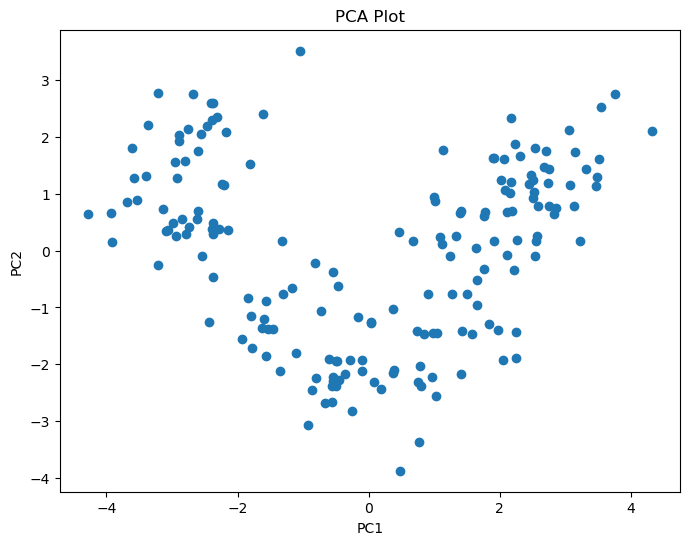

In [15]:
# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_out[:, 0], pca_out[:, 1])
plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [16]:
# Explained variance by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [17]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

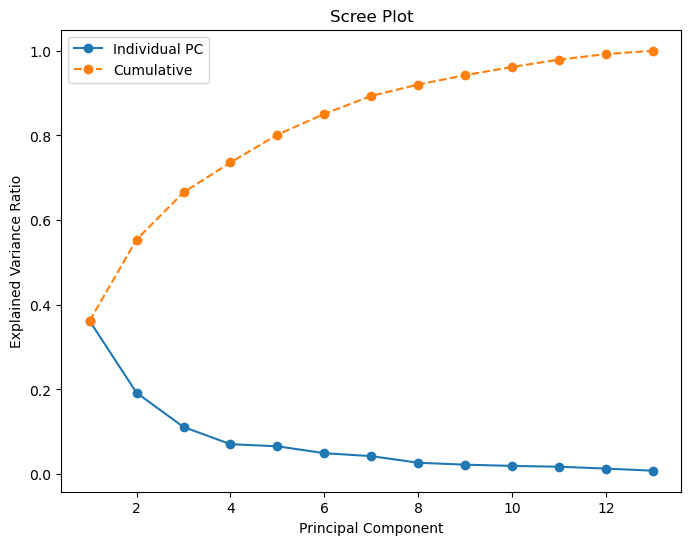

In [18]:
# Plot scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual PC')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

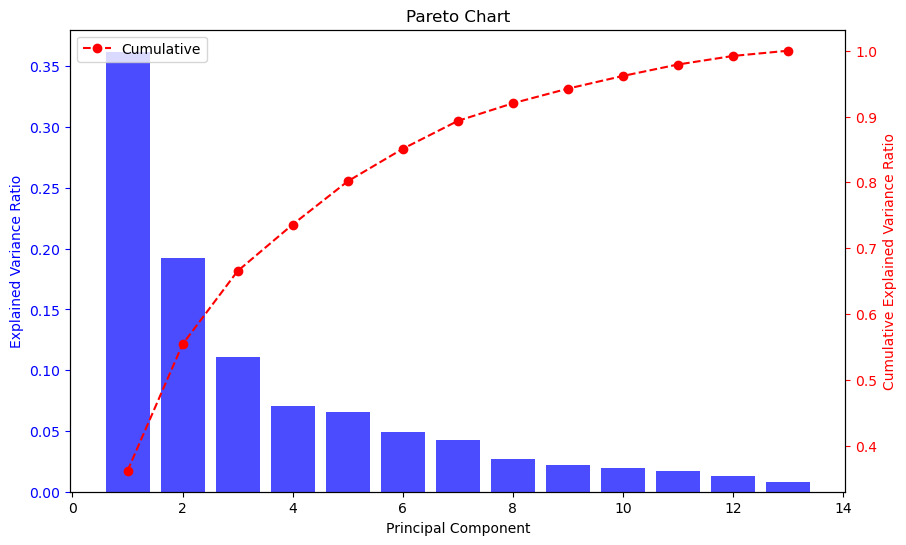

In [19]:
# Sort indices by decreasing explained variance
sorted_indices = np.argsort(explained_variance_ratio)[::-1]

# Sort explained variance and cumulative variance accordingly
sorted_explained_variance = explained_variance_ratio[sorted_indices]
cumulative_variance = np.cumsum(sorted_explained_variance)

# Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for individual explained variance
ax1.bar(range(1, len(sorted_explained_variance) + 1), sorted_explained_variance, color='blue', alpha=0.7, label='Individual PC')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color='blue')
ax1.tick_params('y', colors='blue')

# Line plot for cumulative explained variance (on a secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', linestyle='--', label='Cumulative')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='red')
ax2.tick_params('y', colors='red')

# Title and legend
plt.title('Pareto Chart')
plt.legend(loc='upper left')

# Show the plot
plt.show()

/var/folders/12/8kgz6g6j7r9d3hb2nqwh_q3w0000gn/T/ipykernel_7340/4044505666.py:18: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


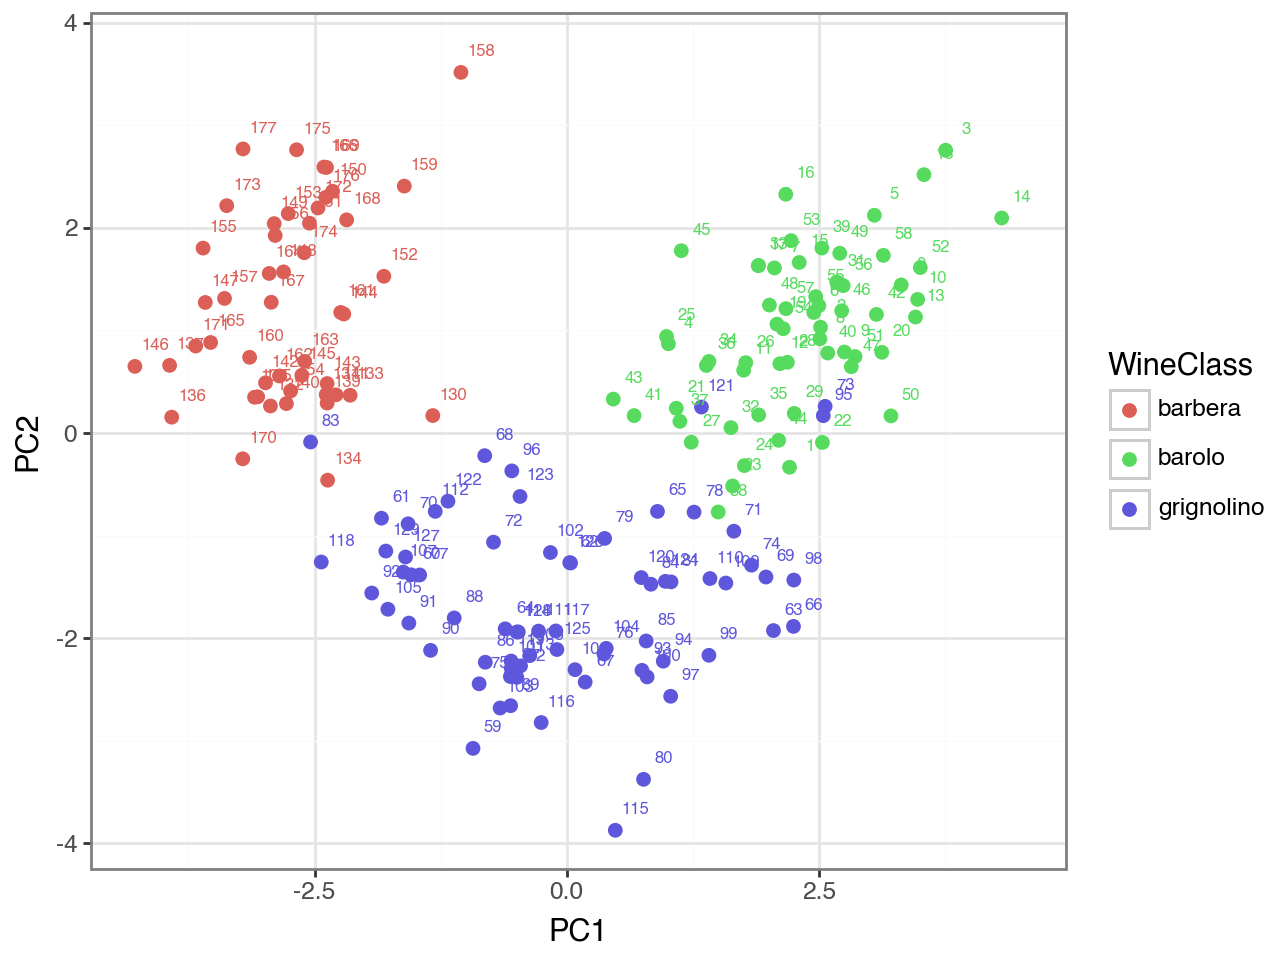

In [20]:
# Create dataframe from PCA output for further analysis or visualization
pca_out_df = pd.DataFrame(pca_out, columns=[f"PC{i+1}" for i in range(pca_out.shape[1])])

# Create a DataFrame with WineClass for groups
WineData['WineClass'] = WineData['WineClass'].astype(str)
group_df = pd.DataFrame({'WineClass': WineData['WineClass']})

# Combine principal components and group information
combined_df = pd.concat([pca_out_df, group_df], axis=1)

# Create a ggplot biplot
g = ggplot(combined_df, aes(x='PC1', y='PC2', color='WineClass', label=combined_df.index)) + \
    geom_point(size=2) + \
    geom_text(nudge_x=0.2, nudge_y=0.2, size=6) + \
    theme_bw()

# Display the biplot
print(g)